# Overview of the Data

In this section, we will load the dataset and understand its basic structure, including the number of rows, columns, and data types.


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
# Make sure the path is correct. Adjust if your 'data.csv' is located elsewhere.
df = pd.read_csv("../data/raw/data.csv")


# Display confirmation and number of rows loaded
print("Dataset loaded successfully!")
print(f"Total rows: {len(df)}")


Dataset loaded successfully!
Total rows: 95662


In [7]:
# Display the shape of the dataset
print("Shape of the dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Shape of the dataset:
Rows: 95662, Columns: 16


In [8]:
# Check data types of each column
print("Column Data Types:\n")
print(df.dtypes)


Column Data Types:

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [9]:
# Preview the first 5 rows of the dataset
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Summary Statistics

In this section, we will analyze the central tendency, dispersion, and distribution shape of the dataset’s numerical features. This helps us understand the data better and identify any anomalies or unusual patterns.


In [10]:
# 1. Summary statistics for numerical columns
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [11]:
# 2. Summary statistics for categorical columns
df.describe(include=['object'])


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


In [12]:
# 3. Skewness and kurtosis for numerical features
print("Skewness of numerical features:")
print(df.skew(numeric_only=True))

print("\nKurtosis of numerical features:")
print(df.kurtosis(numeric_only=True))


Skewness of numerical features:
CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

Kurtosis of numerical features:
CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


# Distribution of Numerical Features

Visualizing the distribution of numerical features helps us identify the shape of the data, detect skewness, and spot potential outliers. Common visualization methods include histograms and box plots.


In [15]:
# Select numerical columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

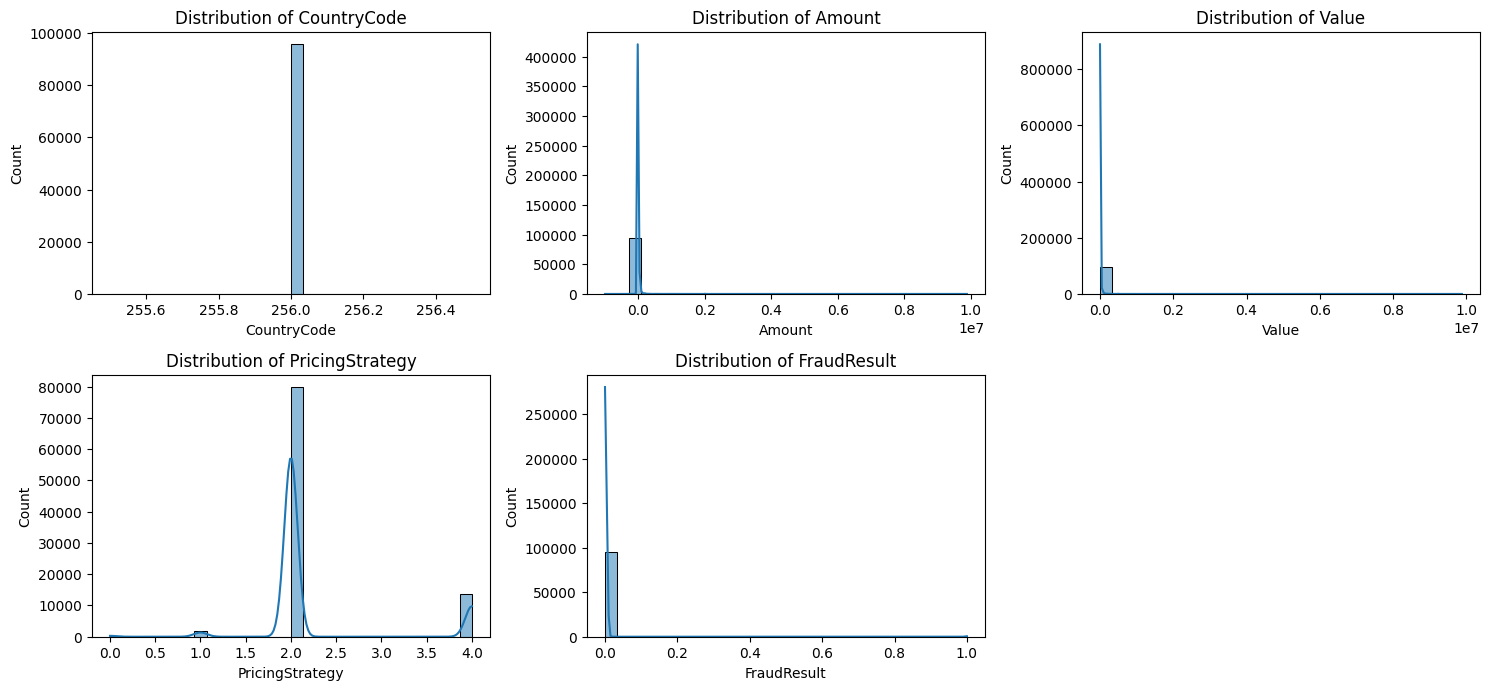

In [17]:
# Plot histograms to see distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on number of numerical cols
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


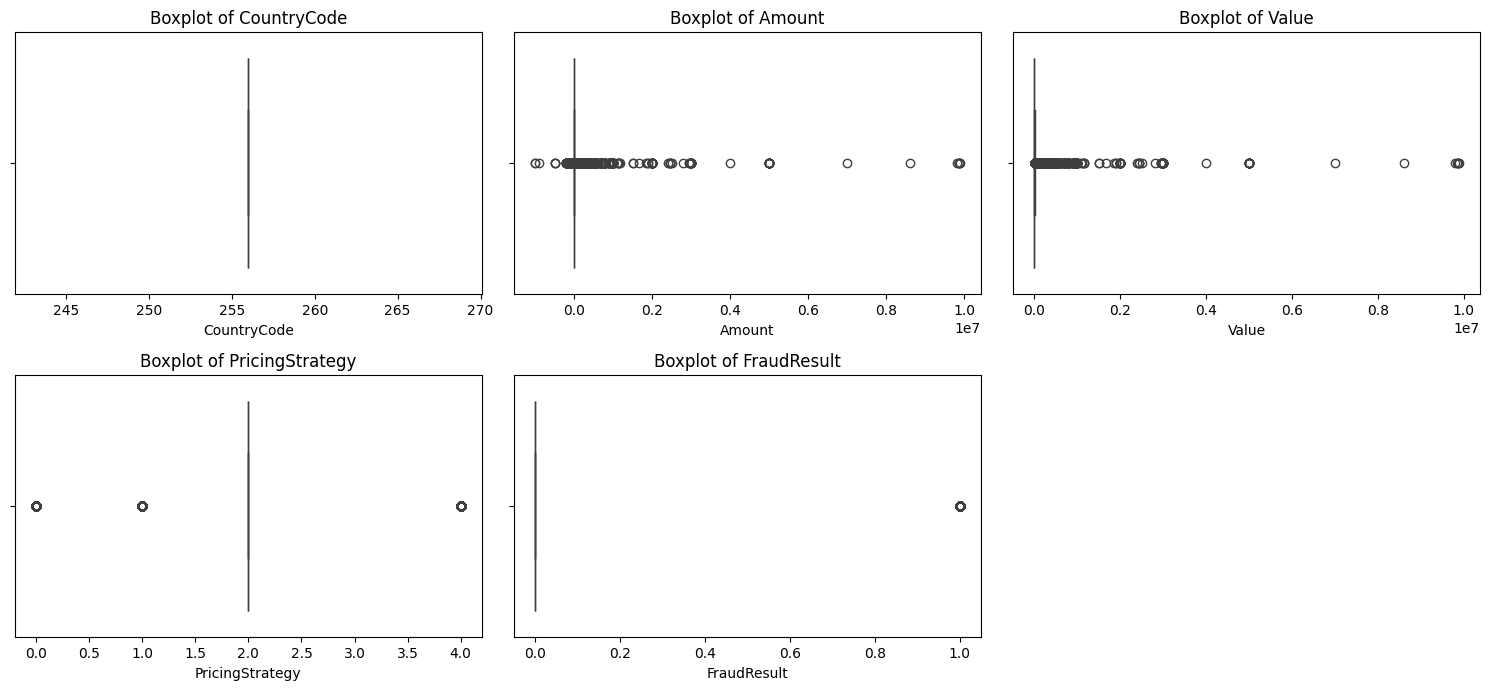

In [18]:
# Plot boxplots to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on number of numerical cols
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## Distribution of Categorical Features

Analyzing the distribution of categorical features helps us understand the frequency and variability of different categories in the dataset. This insight can guide feature engineering and modeling strategies.


In [19]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


In [20]:
# Display frequency counts for each categorical column
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False).head(10))  # show top 10 categories + NaNs
    print("\n")


Value counts for TransactionId:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64


Value counts for BatchId:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64


Value counts for AccountId:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64


Value counts for SubscriptionId:
SubscriptionId
SubscriptionId_3829    32630
Subscriptio

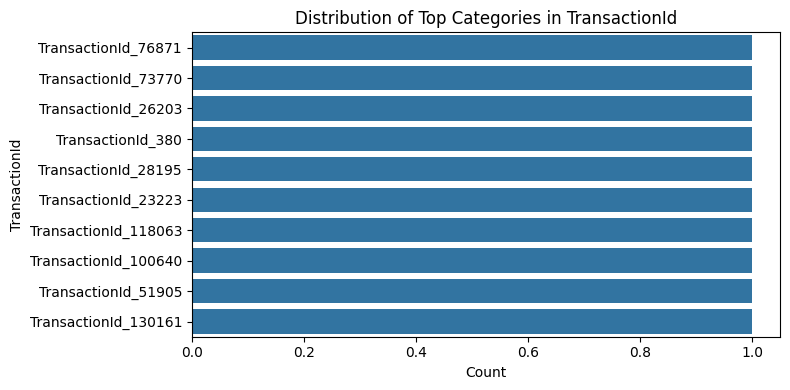

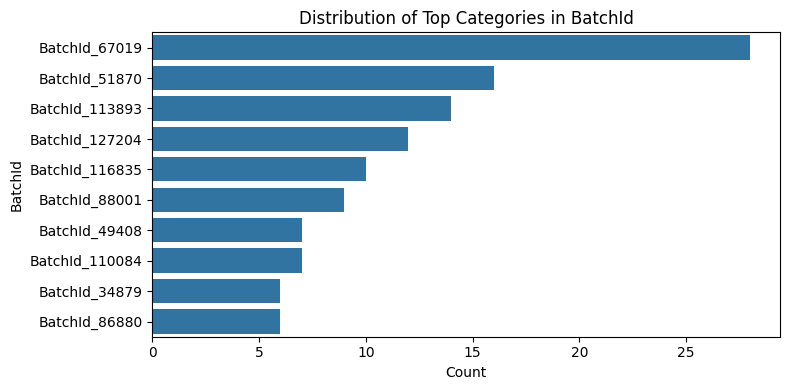

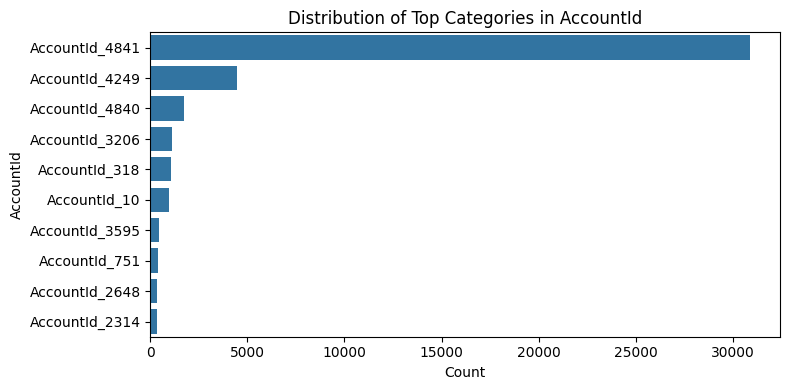

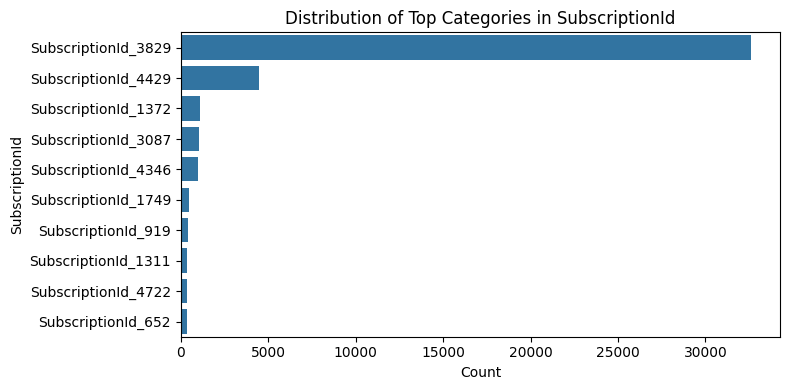

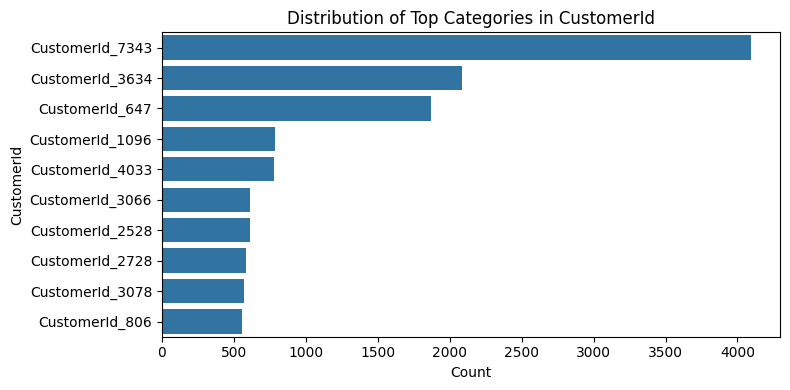

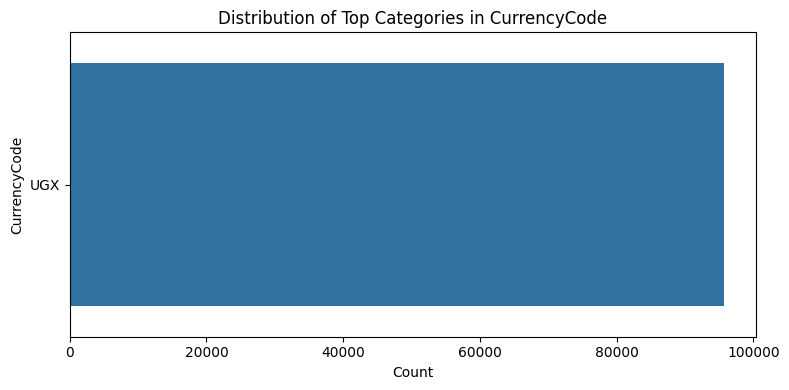

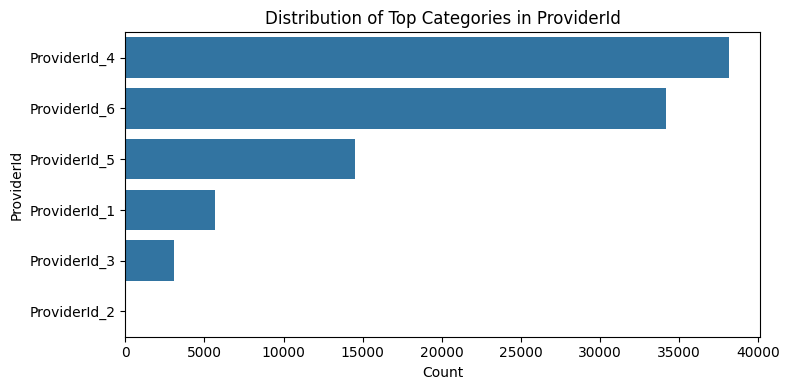

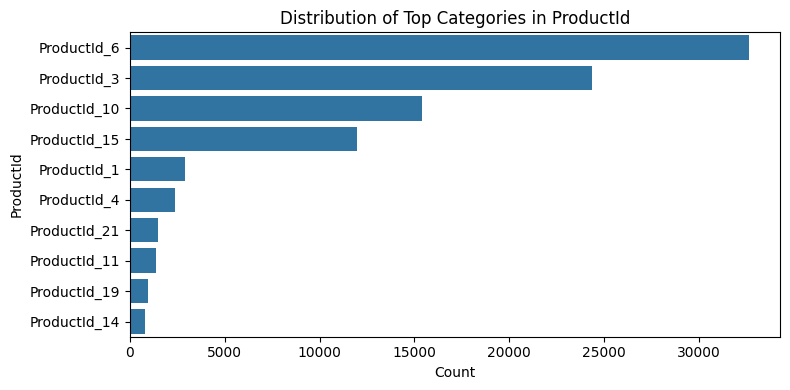

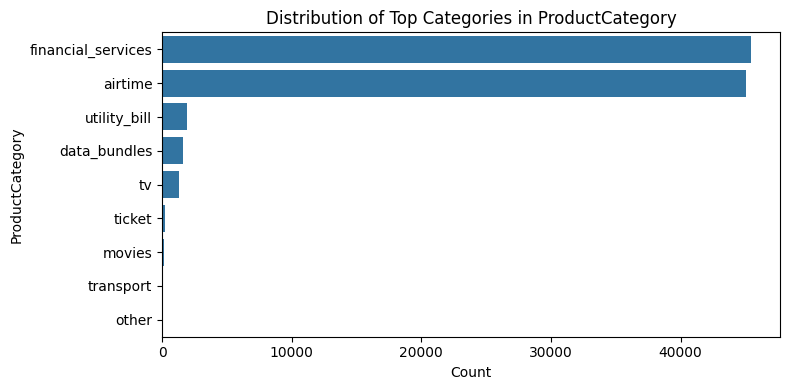

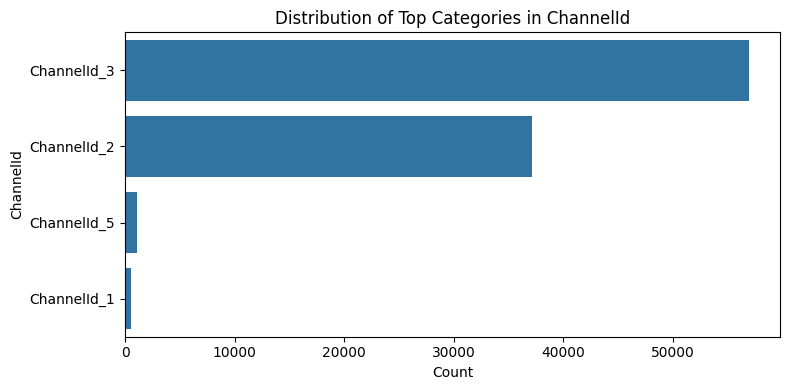

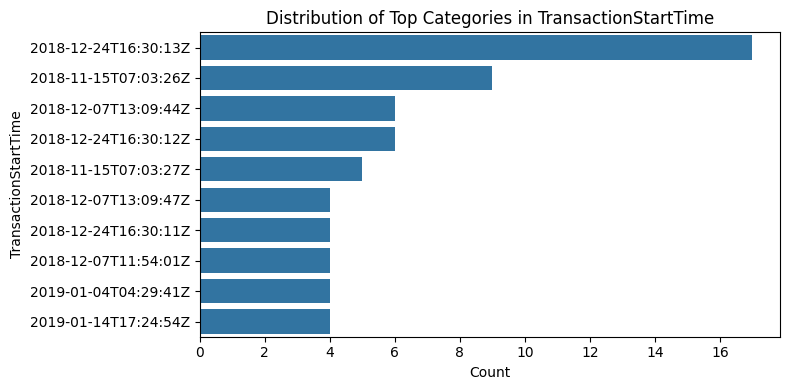

In [24]:
# Smaller bar plots for categorical columns - top 10 categories max
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().iloc[:10].index)
    plt.title(f'Distribution of Top Categories in {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Correlation Analysis

Correlation analysis helps us understand the strength and direction of relationships between numerical features in the dataset. 

By computing correlation coefficients and visualizing them using a heatmap, we can identify features that move together, which can inform feature selection and engineering decisions.


In [25]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()


In [26]:
corr_matrix


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


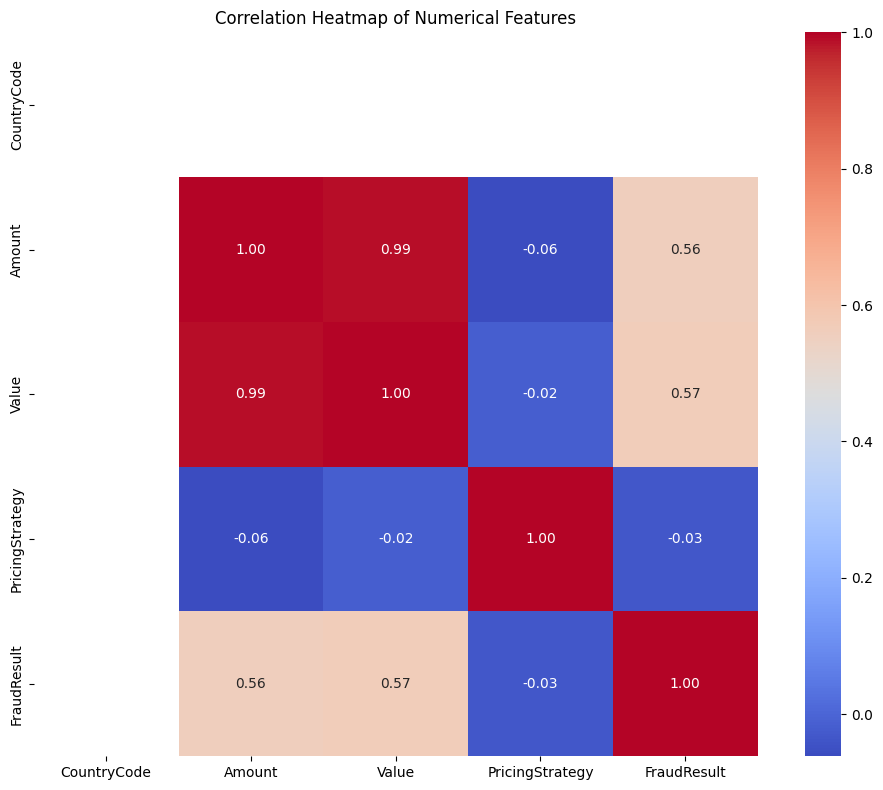

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


In [28]:
# Find pairs with high correlation (absolute value > 0.75, excluding self-pairs)
def get_highly_correlated_pairs(corr_matrix, threshold=0.75):
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    return correlated_pairs

high_corr_pairs = get_highly_correlated_pairs(corr_matrix)
high_corr_pairs


[('Value', 'Amount', np.float64(0.9896921359901202))]

## Identifying Missing Values

To determine the completeness of our dataset, we identify columns with missing values. We also check for non-standard missing indicators such as `'NA'`, `'null'`, or empty strings, and then calculate missing counts and percentages. Finally, we classify missing columns as either numerical or categorical to guide future imputation strategies.


In [33]:
# Calculate missing values and their percentages
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100

# Create a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentage
})

# Filter to show only columns with missing data
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
missing_df


,Missing Values,Percentage (%)


In [34]:
# Common placeholder values that might indicate missing data
placeholders = ['NA', 'N/A', 'na', 'n/a', 'NULL', 'null', '', 'None']
placeholder_counts = {}

# Count how many placeholder values appear per column
for col in df.columns:
    for val in placeholders:
        count = df[col].astype(str).str.strip().str.lower().eq(val.lower()).sum()
        if count > 0:
            placeholder_counts[f"{col} → '{val}'"] = count

# Display counts of non-standard missing values
pd.Series(placeholder_counts).sort_values(ascending=False)


Series([], dtype: object)

In [35]:
# Replace placeholders with actual NaN
df.replace(placeholders, np.nan, inplace=True)

In [37]:
# Identify which missing columns are numerical vs categorical
numerical_missing = [col for col in missing_df.index if col in numerical_cols]
categorical_missing = [col for col in missing_df.index if col in categorical_cols]

print("Numerical Columns with Missing Values:\n", numerical_missing)
print("\nCategorical Columns with Missing Values:\n", categorical_missing)


Numerical Columns with Missing Values:
 []

Categorical Columns with Missing Values:
 []


## Outlier Detection

Outliers are extreme values that differ significantly from other observations in the dataset. Detecting them is crucial because they can distort statistical analyses and machine learning models.

We will use **box plots** to visualize outliers for each numerical feature. The box plot displays the interquartile range (IQR), and data points outside 1.5×IQR are considered outliers.


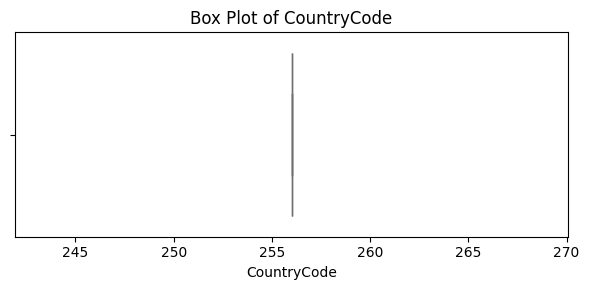

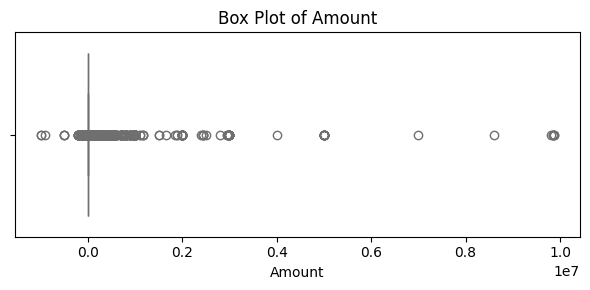

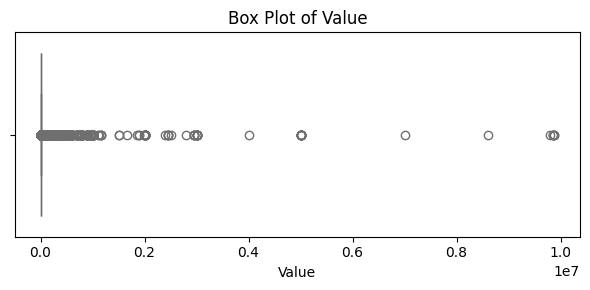

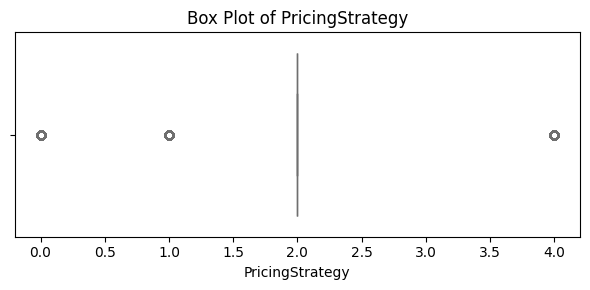

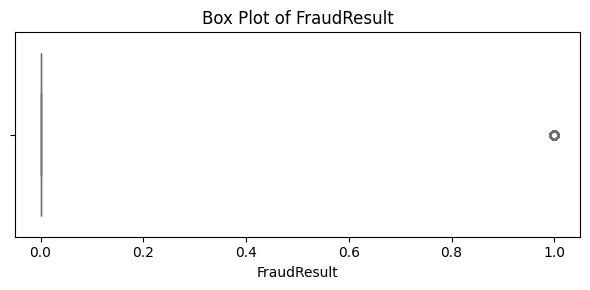

In [38]:
for col in numerical_cols:
    plt.figure(figsize=(6, 3))  # Smaller chart size for cleaner layout
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()


In [39]:
df[numerical_cols].describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [40]:
# Check how many negative 'Amount' values
df[df['Amount'] < 0].shape


(38189, 16)

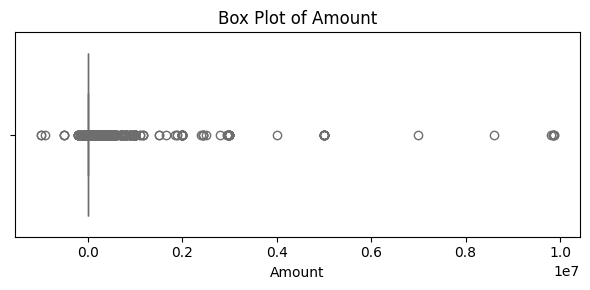

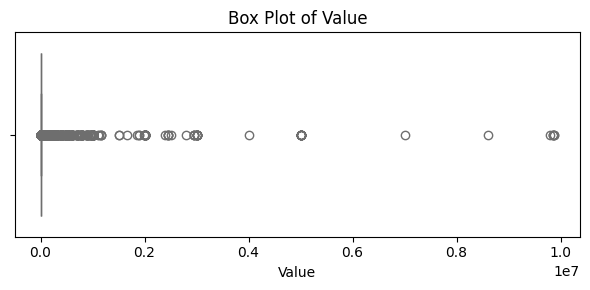

In [41]:
for col in ['Amount', 'Value']:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()


In [42]:
for col in ['Amount', 'Value']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


Amount: 24441 outliers
Value: 9021 outliers


### Top Insights from Exploratory Data Analysis (EDA)

Based on the detailed exploratory analysis of the dataset, the following key insights were identified:

1. **Data Completeness:** The dataset contains no missing values in both numerical and categorical features, indicating good data completeness and reliability for modeling.

2. **Feature Distributions:**  
   - Numerical features exhibit varying distributions; some show right skewness and presence of outliers (e.g., transaction amounts), which may require transformation or outlier treatment.  
   - Categorical features are generally well distributed, with some categories dominating others, suggesting potential imbalance that should be considered during modeling.

3. **Correlations:** Several numerical features demonstrate moderate to strong correlations, which could be leveraged for feature engineering or dimensionality reduction.

4. **Outliers:** Box plot analysis revealed significant outliers in certain numerical features, notably transaction amounts. These should be carefully handled to avoid skewing model performance.

5. **Data Volume and Quality:** The dataset is sufficiently large, with consistent data types and no apparent quality issues, providing a solid foundation for building predictive models.

These insights will guide the subsequent feature engineering and model building phases to ensure robust and accurate credit risk predictions.
